## Lambda layer

In [24]:
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [25]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, '7')

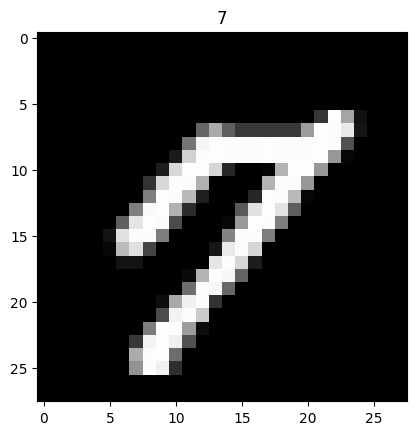

In [26]:
rand_index = random.randint(0, len(X_train))
plt.imshow(X_train[rand_index], cmap="gray")
plt.title(y_train[rand_index])

In [27]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(lambda x:tf.abs(x)),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X_train,
          y_train,
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 9.6482 - accuracy: 0.9037
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 4.7719 - accuracy: 0.9491
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.8662 - accuracy: 0.9595
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.4431 - accuracy: 0.9637
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.1097 - accuracy: 0.9676


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.5578 - accuracy: 0.9664


[4.557840347290039, 0.9664000272750854]

In [ ]:
def custom_relu(x):
  return K.maximum(-0.1, x)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(custom_relu),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train,
          y_train,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 2.2429 - accuracy: 0.8557 - val_loss: 0.5059 - val_accuracy: 0.8910
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3490 - accuracy: 0.9163 - val_loss: 0.3254 - val_accuracy: 0.9239
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.9306 - val_loss: 0.2833 - val_accuracy: 0.9306
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2391 - accuracy: 0.9389 - val_loss: 0.3069 - val_accuracy: 0.9278
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2222 - accuracy: 0.9437 - val_loss: 0.3294 - val_accuracy: 0.9169


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.9169


[0.3293614983558655, 0.9168999791145325]

In [ ]:
history.history

{'loss': [2.24289608001709,
  0.34899649024009705,
  0.2705768644809723,
  0.23912738263607025,
  0.22217826545238495],
 'accuracy': [0.8557166457176208,
  0.9163333177566528,
  0.9305833578109741,
  0.9389166831970215,
  0.9437000155448914],
 'val_loss': [0.5058649182319641,
  0.32536569237709045,
  0.28327661752700806,
  0.30690768361091614,
  0.3293614983558655],
 'val_accuracy': [0.890999972820282,
  0.9239000082015991,
  0.9305999875068665,
  0.9277999997138977,
  0.9168999791145325]}

<Axes: >

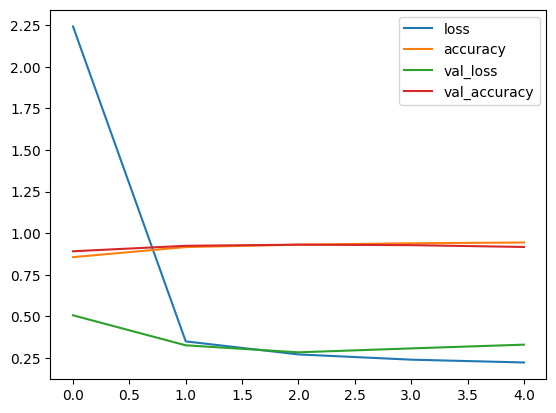

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

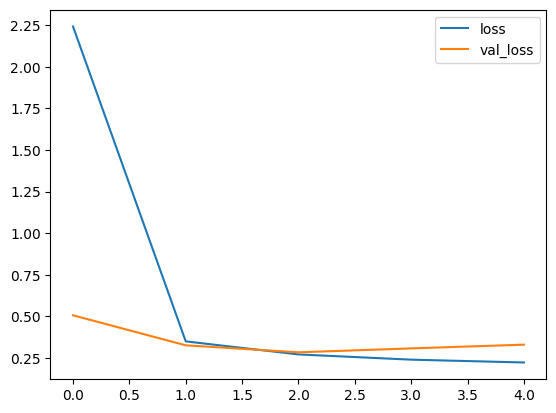

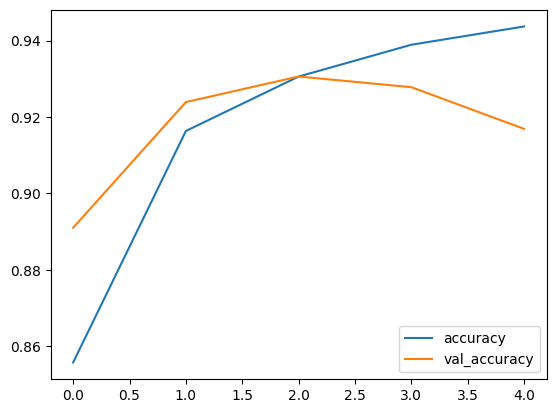

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(loc="upper right")
plt.figure()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label='val_accuracy')
plt.legend(loc="lower right")

## Simple Dense layer

In [2]:
import tensorflow as tf

In [69]:
class Dense(tf.keras.layers.Layer):
  def __init__(self, units=32, **args):
    super(Dense, self).__init__()
    self.units = units

  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name="kernel",
                         initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                         trainable=True)

    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name="bias",
                         initial_value=b_init(shape=(self.units,), dtype="float32"),
                         trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

In [52]:
my_dense = Dense(units=1)
x = tf.ones((1,1))
y = my_dense(x)
print(my_dense.variables)

[<tf.Variable 'dense_26/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.11102729]], dtype=float32)>, <tf.Variable 'dense_26/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    Dense(32),
    tf.keras.layers.Dropout(0.5),
    Dense(32),
    tf.keras.layers.Dropout(0.5),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 32)                25120     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 265

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [62]:
model.fit(X_train,
          y_train,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8059 - accuracy: 0.5305 - val_loss: 0.9958 - val_accuracy: 0.8119
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5606 - accuracy: 0.5926 - val_loss: 0.9253 - val_accuracy: 0.8458
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4437 - accuracy: 0.6268 - val_loss: 1.0063 - val_accuracy: 0.7973
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0453 - accuracy: 0.5171 - val_loss: 2.3026 - val_accuracy: 0.2626
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3239 - accuracy: 0.1700 - val_loss: 2.3026 - val_accuracy: 0.2017


In [115]:
import numpy as np
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32)

class Dense(tf.keras.layers.Layer):
  def __init__(self, units=32, **args):
    super(Dense, self).__init__()
    self.units = units

  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name="kernel",
                         initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                         trainable=True)

    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value=b_init(shape=(self.units, ), dtype="float32"),
                         trainable=True,
                         name='bias')


  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b


inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.float32)
z = Dense(units=1)(inputs)
model = tf.keras.Model(inputs, z)
model.summary()
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam())

model.fit(x, y, epochs=500, verbose=0)
model.predict([10.0])


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_69 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 49ms/step


array([[3.854081]], dtype=float32)

## Custom layer with activation function

In [116]:
class Dense(tf.keras.layers.Layer):
  def __init__(self, units, activation=None):
    super(Dense, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)

  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(inital_value=w_init(shape=(input_shape[-1], self.units),
                                             dtype='float32'),
                         name="weights",
                         trainable=True)

    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value=b_init(shape=(self.units,),
                                              dtype='float32'),
                         name="bias",
                         trainable=True)

  def call(self, inputs):
    return self.activation(tf.matmul(inputs, self.w) + self.b)